In [86]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
import operator
# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import precision_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
import warnings
warnings.filterwarnings('ignore')

In [87]:
data = pd.read_csv('./ai_challenger_stock_train_20170916/stock_train_data_20170916.csv')
tdata = pd.read_csv('./ai_challenger_stock_test_20170916/stock_test_data_20170916.csv')
a = data.copy()
data.head()

,id,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,...,feature82,feature83,feature84,feature85,feature86,feature87,weight,label,group,era
0,0,-1.150569,-1.500644,-1.068335,-1.133751,0.297342,-0.328536,0.848123,-0.808410,-0.034576,...,1.070653,1.272773,1.514803,-0.859637,-0.838864,-1.697330,10.0,1.0,11,1
1,1,-0.045875,0.894342,0.154883,0.569475,0.004646,0.830933,0.358599,0.001893,0.487219,...,0.910292,-0.925892,-0.328414,-0.151901,-0.056297,-0.088710,7.0,0.0,15,1
2,2,0.633006,0.403639,0.619462,0.484355,-0.128277,1.194514,0.507192,1.142915,0.788770,...,1.543452,1.100764,-0.655582,0.114741,2.741738,0.570810,7.0,1.0,16,1
3,3,0.807198,1.464890,1.119848,2.758615,0.697739,1.129501,0.618532,2.092787,1.245047,...,1.276560,0.424591,-1.069715,0.466429,0.541605,0.776763,3.0,1.0,6,1
4,4,-0.663572,-0.222739,-0.564034,-1.014801,-0.146525,0.090281,0.589727,-0.481440,0.087566,...,1.006219,-1.387110,0.655403,-0.638591,-0.394648,-0.735815,14.0,0.0,12,1


In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296104 entries, 0 to 296103
Data columns (total 93 columns):
id           296104 non-null int64
feature0     296104 non-null float64
feature1     296104 non-null float64
feature2     296104 non-null float64
feature3     296104 non-null float64
feature4     296104 non-null float64
feature5     296104 non-null float64
feature6     296104 non-null float64
feature7     296104 non-null float64
feature8     296104 non-null float64
feature9     296104 non-null float64
feature10    296104 non-null float64
feature11    296104 non-null float64
feature12    296104 non-null float64
feature13    296104 non-null float64
feature14    296104 non-null float64
feature15    296104 non-null float64
feature16    296104 non-null float64
feature17    296104 non-null float64
feature18    296104 non-null float64
feature19    296104 non-null float64
feature20    296104 non-null float64
feature21    296104 non-null float64
feature22    296104 non-null float64
fea

In [89]:
data.tail()

,id,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,...,feature82,feature83,feature84,feature85,feature86,feature87,weight,label,group,era
296099,296099,-0.417056,-0.192018,-0.436023,-0.572091,-0.527764,-0.246055,0.873549,-0.660974,-1.095057,...,-0.850972,0.074629,1.056795,-0.645680,-0.477173,-0.715724,2.0,1.0,13,20
296100,296100,0.616404,0.341256,0.141570,-0.249392,-0.815081,-0.195990,0.784361,-0.075269,-0.377556,...,-0.322400,0.599967,1.053161,-0.144380,0.134476,0.092748,2.0,0.0,8,20
296101,296101,-0.335064,0.267432,-0.322785,0.395117,-0.706472,-0.218126,1.737908,-0.366817,-0.770523,...,-0.867530,-1.557883,-0.076601,-0.278991,-0.403693,0.057825,13.0,1.0,2,20
296102,296102,-0.496854,-1.350785,-0.348988,-0.069685,0.397834,-1.113671,-0.985645,0.546098,-1.343595,...,-1.362100,1.300016,1.776090,-1.122868,0.756770,-1.299101,4.0,0.0,15,20
296103,296103,-0.506480,0.387116,-0.222288,-0.193649,-0.448976,-0.284000,-1.308533,-0.265140,-0.445406,...,-0.507186,-1.297621,0.461352,-0.453639,-0.023174,-0.290823,3.0,0.0,1,20


In [90]:
data.describe()

,id,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,...,feature82,feature83,feature84,feature85,feature86,feature87,weight,label,group,era
count,296104.000000,296104.000000,296104.000000,296104.000000,296104.000000,296104.000000,296104.000000,296104.000000,296104.000000,296104.000000,...,296104.000000,296104.000000,296104.000000,296104.000000,296104.000000,296104.000000,296104.000000,296104.000000,296104.000000,296104.000000
mean,148051.500000,0.013858,0.051243,-0.083005,0.030005,-0.146793,0.256851,-0.043433,-0.029366,-0.046826,...,0.069683,-0.028863,0.041779,-0.133414,0.020138,-0.055573,3.986947,0.525653,13.139036,10.053626
std,85478.006392,0.959150,0.811450,0.608213,1.000210,0.614150,0.861420,0.983453,0.821744,0.780696,...,0.886941,0.999802,0.986417,0.611637,0.819998,0.721038,3.707121,0.499342,7.211247,5.604211
min,0.000000,-1.592021,-8.531425,-3.385172,-1.962820,-1.049226,-3.215164,-1.368800,-1.116270,-3.905614,...,-3.288532,-1.565028,-4.036047,-3.812347,-1.141270,-4.857749,0.000000,0.000000,1.000000,1.000000
25%,74025.750000,-0.648435,-0.337273,-0.415522,-0.633389,-0.578445,-0.288086,-0.989287,-0.566731,-0.541313,...,-0.533981,-0.992732,-0.588037,-0.497362,-0.502440,-0.499929,1.000000,0.000000,7.000000,5.000000
50%,148051.500000,-0.170359,0.220776,-0.231281,-0.119480,-0.281706,0.390967,-0.121544,-0.235591,-0.042126,...,0.033199,0.063651,0.119634,-0.220610,-0.162904,-0.058433,3.000000,1.000000,13.000000,10.000000
75%,222077.250000,0.468121,0.492128,0.219475,0.520344,0.129404,0.919117,0.811780,0.269351,0.437017,...,0.617070,0.882341,0.744057,0.195333,0.312182,0.391199,5.000000,1.000000,18.000000,15.000000
max,296103.000000,109.915077,6.153323,7.542597,138.878602,7.938502,1.661711,2.076934,42.807711,5.201882,...,6.349727,1.591683,2.610622,5.739303,75.467710,6.289060,63.000000,1.000000,28.000000,20.000000


In [91]:
data[['group', 'label']].groupby(['group'], as_index=False).mean().sort_values(by='label', ascending=False)

,group,label
20,21,0.548358
6,7,0.548206
22,23,0.546370
2,3,0.537520
9,10,0.536868
17,18,0.534943
16,17,0.534399
14,15,0.533564
5,6,0.531400
15,16,0.530682


In [92]:
data[['era', 'label']].groupby(['era'], as_index=False).mean().sort_values(by='label', ascending=False)

,era,label
5,6,0.651413
17,18,0.648888
18,19,0.633551
10,11,0.626012
6,7,0.614802
16,17,0.596593
12,13,0.594193
8,9,0.584987
13,14,0.549129
19,20,0.515997


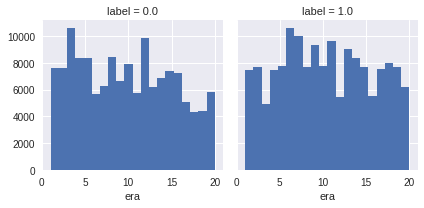

In [93]:
g = sns.FacetGrid(data, col='label')
g.map(plt.hist, 'era', bins=20)

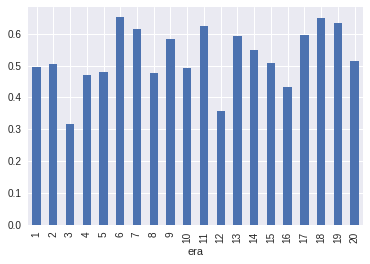

In [94]:
data.groupby(data.era)['label'].mean().plot.bar()


In [10]:
# from scipy import stats
# fig, axes = plt.subplots(2,1,figsize=(8,6))
# sns.set_style('white')
# sns.distplot(data.era.fillna(-20), rug=True, color='b', ax=axes[0])
# ax0 = axes[0]
# ax0.set_title('era distribution')
# ax0.set_xlabel('')

# ax1 = axes[1]
# ax1.set_title('era survived distribution')
# k1 = sns.distplot(data[data.Survived==0].era.fillna(-20), hist=False, color='r', ax=ax1, label='dead')
# k2 = sns.distplot(data[data.Survived==1].era.fillna(-20), hist=False, color='g', ax=ax1, label='alive')
# ax1.set_xlabel('')

# ax1.legend(fontsize=16)

In [95]:
data.weight=data.weight.apply(lambda x: x+0.001)

In [96]:
data.head()

,id,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,...,feature82,feature83,feature84,feature85,feature86,feature87,weight,label,group,era
0,0,-1.150569,-1.500644,-1.068335,-1.133751,0.297342,-0.328536,0.848123,-0.808410,-0.034576,...,1.070653,1.272773,1.514803,-0.859637,-0.838864,-1.697330,10.001,1.0,11,1
1,1,-0.045875,0.894342,0.154883,0.569475,0.004646,0.830933,0.358599,0.001893,0.487219,...,0.910292,-0.925892,-0.328414,-0.151901,-0.056297,-0.088710,7.001,0.0,15,1
2,2,0.633006,0.403639,0.619462,0.484355,-0.128277,1.194514,0.507192,1.142915,0.788770,...,1.543452,1.100764,-0.655582,0.114741,2.741738,0.570810,7.001,1.0,16,1
3,3,0.807198,1.464890,1.119848,2.758615,0.697739,1.129501,0.618532,2.092787,1.245047,...,1.276560,0.424591,-1.069715,0.466429,0.541605,0.776763,3.001,1.0,6,1
4,4,-0.663572,-0.222739,-0.564034,-1.014801,-0.146525,0.090281,0.589727,-0.481440,0.087566,...,1.006219,-1.387110,0.655403,-0.638591,-0.394648,-0.735815,14.001,0.0,12,1


In [97]:
data

,id,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,...,feature82,feature83,feature84,feature85,feature86,feature87,weight,label,group,era
0,0,-1.150569,-1.500644,-1.068335,-1.133751,0.297342,-0.328536,0.848123,-0.808410,-0.034576,...,1.070653,1.272773,1.514803,-0.859637,-0.838864,-1.697330,10.001,1.0,11,1
1,1,-0.045875,0.894342,0.154883,0.569475,0.004646,0.830933,0.358599,0.001893,0.487219,...,0.910292,-0.925892,-0.328414,-0.151901,-0.056297,-0.088710,7.001,0.0,15,1
2,2,0.633006,0.403639,0.619462,0.484355,-0.128277,1.194514,0.507192,1.142915,0.788770,...,1.543452,1.100764,-0.655582,0.114741,2.741738,0.570810,7.001,1.0,16,1
3,3,0.807198,1.464890,1.119848,2.758615,0.697739,1.129501,0.618532,2.092787,1.245047,...,1.276560,0.424591,-1.069715,0.466429,0.541605,0.776763,3.001,1.0,6,1
4,4,-0.663572,-0.222739,-0.564034,-1.014801,-0.146525,0.090281,0.589727,-0.481440,0.087566,...,1.006219,-1.387110,0.655403,-0.638591,-0.394648,-0.735815,14.001,0.0,12,1
5,5,-0.121758,2.036574,2.019933,0.009001,1.286318,1.335796,1.202396,-0.304115,1.955159,...,2.813698,1.129900,-1.381571,0.823879,-0.109610,1.376883,9.001,1.0,13,1
6,6,-0.798186,-0.260376,-0.365022,-0.306009,-0.951589,0.235478,1.215189,-0.588606,0.519717,...,1.306128,1.026244,0.688843,-0.340555,-0.601439,-0.847762,4.001,1.0,6,1
7,7,-0.902014,-0.207607,-0.517196,-0.257321,-0.463626,0.737143,1.215922,-0.839908,0.307224,...,0.475328,0.919698,1.452905,-0.579832,-0.671717,-0.674825,6.001,0.0,8,1
8,8,1.091828,0.396792,0.840476,0.464267,0.268297,0.873686,0.959305,2.339159,1.402293,...,2.205746,1.144025,0.808581,0.249552,3.602603,0.809702,10.001,1.0,16,1
9,9,-0.878946,-0.669584,-0.209808,0.394663,0.570635,-0.048286,-0.490557,-0.742052,-0.236371,...,0.235708,0.406435,0.940671,-0.679901,-0.641080,-0.931973,5.001,0.0,23,1


In [98]:
a = data.copy()

In [99]:
y = a.label
erab=a.era
groupb=a.group
del a['era']
del a['label']
del a['group']
del a['id']
we=a.weight

In [100]:
we

0         10.001
1          7.001
2          7.001
3          3.001
4         14.001
5          9.001
6          4.001
7          6.001
8         10.001
9          5.001
10         5.001
11         4.001
12         5.001
13         6.001
14         3.001
15         2.001
16         7.001
17         0.001
18         8.001
19         4.001
20         6.001
21         9.001
22         4.001
23         1.001
24         3.001
25         2.001
26         7.001
27         0.001
28         3.001
29         4.001
           ...  
296074     0.001
296075     5.001
296076     3.001
296077     1.001
296078    33.001
296079     2.001
296080     4.001
296081     0.001
296082     4.001
296083     3.001
296084     4.001
296085     1.001
296086     2.001
296087     0.001
296088     5.001
296089     4.001
296090     6.001
296091     6.001
296092     1.001
296093     0.001
296094     5.001
296095    13.001
296096     4.001
296097     9.001
296098     2.001
296099     2.001
296100     2.001
296101    13.0

In [101]:
we=we.reshape((296104,1))

In [102]:
c=np.multiply(a,we)

In [103]:
a=c

In [104]:
a=pd.concat([erab,a],axis=1)
a=pd.concat([a,groupb],axis=1)
a=pd.concat([a,y],axis=1)

In [138]:
a1=a[(a.era==1)]
a2=a[(a.era==2)]
a3=a[(a.era==3)]
a4=a[(a.era==4)]
a5=a[(a.era==5)]
a6=a[(a.era==6)]
a7=a[(a.era==7)]
a8=a[(a.era==8)]
a9=a[(a.era==9)]
a10=a[(a.era==10)]
a11=a[(a.era==11)]
a12=a[(a.era==12)]
a13=a[(a.era==13)]
a14=a[(a.era==14)]
a15=a[(a.era==15)]
a16=a[(a.era==16)]
a17=a[(a.era==17)]
a18=a[(a.era==18)]
a19=a[(a.era==19)]
a20=a[(a.era==20)]

In [106]:
# i=list(range(1,21))
# si=[]
# for num in i:
#     si.append(str("a"+str(num)))
#     si[num-1]=a[(a.era==num)]


In [139]:
del a1['era']
del a2['era']
del a3['era']
del a4['era']

del a5['era']
del a6['era']
del a7['era']
del a8['era']

del a9['era']
del a10['era']
del a11['era']
del a12['era']
del a13['era']
del a14['era']
del a15['era']
del a16['era']
del a17['era']
del a18['era']
del a19['era']

In [24]:
# com=[a1,a2,a3,a5,a6,a8,a9,a10,a12,a13,a14]
# del com['era']

In [140]:

# del a10['era']
# del a12['era']
# del a16['era']
# del a8['era']
tra=pd.concat([a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,a15,a16,a17,a18,a19],axis=0)

In [141]:
y_tra=tra.label
del tra['weight']
del tra['label']

In [142]:
tra

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature79,feature80,feature81,feature82,feature83,feature84,feature85,feature86,feature87,group
0,-11.506843,-15.007943,-10.684423,-11.338643,2.973714,-3.285687,8.482080,-8.084913,-0.345799,-13.117899,...,4.942715,-7.773986,-5.643250,10.707603,12.729006,15.149544,-8.597234,-8.389480,-16.974993,11
1,-0.321173,6.261287,1.084334,3.986893,0.032526,5.817361,2.510549,0.013254,3.411021,4.529573,...,6.610892,-1.015990,-0.216104,6.372957,-6.482173,-2.299226,-1.063459,-0.394132,-0.621060,15
2,4.431674,2.825879,4.336851,3.390971,-0.898066,8.362795,3.550849,8.001546,5.522181,-3.502430,...,7.727326,-2.352451,2.913673,10.805707,7.706446,-4.589732,0.803300,19.194905,3.996243,16
3,2.422402,4.396134,3.360663,8.278605,2.093914,3.389632,1.856216,6.280453,3.736387,4.103150,...,4.200242,2.485126,2.783525,3.830958,1.274198,-3.210215,1.399752,1.625357,2.331067,6
4,-9.290675,-3.118566,-7.897046,-14.208222,-2.051495,1.264021,8.256773,-6.740639,1.226005,-16.160748,...,7.488540,-9.143766,-10.585456,14.088072,-19.420921,9.176299,-8.940915,-5.525472,-10.302144,12
5,-1.095942,18.331198,18.181416,0.081019,11.578144,12.023498,10.822763,-2.737343,17.598387,18.390335,...,15.748523,1.974473,10.757856,25.326094,10.170230,-12.435524,7.415737,-0.986603,12.393320,13
6,-3.193543,-1.041764,-1.460452,-1.224342,-3.807306,0.942148,4.861970,-2.355011,2.079388,0.328555,...,2.716189,-0.104189,-2.452193,5.225818,4.106003,2.756061,-1.362561,-2.406358,-3.391896,6
7,-5.412984,-1.245849,-3.103696,-1.544180,-2.782222,4.423598,7.296746,-5.040289,1.843652,-1.340558,...,3.499460,-3.432980,-4.944280,2.852441,5.519109,8.718885,-3.479574,-4.030972,-4.049625,8
8,10.919371,3.968315,8.405596,4.643132,2.683238,8.737730,9.594009,23.393933,14.024336,-5.400024,...,11.808269,-0.148621,8.714639,22.059667,11.441393,8.086617,2.495769,36.029634,8.097827,16
9,-4.395607,-3.348588,-1.049249,1.973710,2.853746,-0.241479,-2.453273,-3.711003,-1.182089,5.033049,...,2.378837,-3.712524,0.943373,1.178775,2.032583,4.704293,-3.400186,-3.206041,-4.660797,23


In [143]:
# del a13['era']
# del a14['era']
# del a15['era']
# del a16['era']
# del a17['era']
# del a18['era']
# del a19['era']
del a20['era']
val=a20

In [144]:
# val=pd.concat([a13,a14,a15,a16,a17,a20],axis=0)
# y3 = a3.label
# del a3['era']
# del a3['weight']
# del a3['label']


In [145]:
val.describe()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature81,feature82,feature83,feature84,feature85,feature86,feature87,weight,group,label
count,12002.000000,12002.000000,12002.000000,12002.000000,12002.000000,12002.000000,12002.000000,12002.000000,12002.000000,12002.000000,...,12002.000000,12002.000000,12002.000000,12002.000000,12002.000000,12002.000000,12002.000000,12002.000000,12002.000000,12002.000000
mean,-0.343788,-0.190246,-0.810130,0.369906,-0.620479,-1.833940,2.950420,-1.033826,-3.654541,-0.265944,...,-1.186665,-3.399448,-0.128727,3.532153,-2.026188,0.182181,-1.799493,26.668701,13.222880,0.515997
std,4.258675,4.824150,2.909162,4.770900,3.207283,4.286846,5.142384,2.993397,4.662927,4.516633,...,2.292199,4.345601,5.132973,5.041677,2.967583,3.536910,3.892292,61.460028,7.168004,0.499765
min,-31.642888,-105.705913,-40.759576,-46.270624,-28.464458,-61.190281,-24.060317,-27.466088,-74.687946,-64.962333,...,-24.194718,-67.485730,-62.332538,-18.486924,-56.537849,-22.196645,-65.185012,0.000001,1.000000,0.000000
25%,-1.648651,-0.894844,-1.537172,-1.271049,-1.777894,-2.861308,0.000974,-2.118559,-4.843222,-1.199622,...,-2.010278,-4.654814,-2.178047,0.431918,-2.637833,-1.052518,-2.550748,1.002001,7.000000,0.000000
50%,-0.344809,0.015655,-0.499117,-0.000509,-0.600935,-0.667969,1.756886,-0.755846,-2.219760,-0.000998,...,-0.772641,-2.039393,0.000664,2.130900,-1.225333,-0.057184,-0.795935,9.006001,14.000000,1.000000
75%,0.362848,1.317108,0.000307,1.199992,0.000503,0.131938,4.940610,-0.000403,-0.840450,0.975160,...,-0.000768,-0.717721,2.075877,5.198339,-0.427837,0.827746,-0.000463,25.010001,18.000000,1.000000
max,138.820173,30.146560,29.574197,71.073737,59.159028,19.795195,63.619909,34.061101,8.080614,54.211586,...,23.012785,7.863719,38.064909,54.655841,9.157361,80.301209,17.987924,1849.086001,28.000000,1.000000


In [146]:
y_val = val.label

del val['weight']
del val['label']


In [147]:
val

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature79,feature80,feature81,feature82,feature83,feature84,feature85,feature86,feature87,group
284102,-0.000975,-0.000863,-0.000909,-0.001271,0.000397,-0.000963,0.000008,-0.000814,-0.000753,-0.001533,...,-0.000700,-0.000694,-0.000634,-0.000807,-0.000787,0.000069,-0.000746,-0.000779,-0.000649,16
284103,-1.956242,3.467023,-1.188948,-1.607761,-5.727219,5.310090,8.325389,-3.224749,-2.288296,0.493312,...,0.848420,-2.838413,-3.853955,-2.271015,9.316333,2.501198,-2.216548,-2.582334,0.627115,27
284104,5.362168,1.486123,-0.226444,11.523492,0.652124,1.661373,2.423214,-0.618378,-2.611174,1.551423,...,-0.772982,3.905739,-0.185329,-2.103510,-4.831505,-0.417708,-1.699642,1.840516,-1.077297,4
284105,0.000537,0.000243,-0.000074,0.000656,-0.000423,0.000452,-0.001364,-0.000351,-0.000539,-0.000190,...,-0.000037,-0.000253,-0.000374,0.000120,-0.001440,0.000612,-0.000462,0.000321,-0.000413,12
284106,-1.403634,-1.781910,-3.292446,3.072969,-4.398084,-1.295591,12.092760,2.114090,-9.019387,-0.906568,...,-6.243443,-5.972844,-6.002985,-8.091974,11.509528,16.782168,-5.637256,10.728680,-4.583853,6
284107,-0.484070,0.276403,-0.348591,-0.514217,-0.747912,0.295923,3.013456,-0.572858,-1.299135,0.886790,...,-0.468710,-1.278582,-1.115109,-1.043496,-3.042654,-0.209353,-0.759876,0.287512,-0.120605,8
284108,-0.878235,-0.603733,-1.114284,-0.781444,-1.128919,0.256926,2.789278,-1.264253,-1.906814,-0.656067,...,-0.778728,-1.338590,-1.615870,-1.473368,3.148546,4.452227,-1.441321,-0.696316,-1.192792,13
284109,-0.112782,0.971784,-0.585776,-0.120593,-1.910008,1.065522,2.854524,0.337045,-1.132677,0.242539,...,-0.149046,-0.858649,-1.242996,-0.813722,-3.058932,1.162677,-0.852481,1.072722,-0.112625,26
284110,-0.190976,-1.094657,-0.385109,0.502447,-0.480495,-0.342967,0.914516,-0.535478,-1.175285,-0.070654,...,-0.750349,-0.471645,-0.635482,-1.038319,1.354830,1.704143,-0.854724,-0.193906,-0.923314,6
284111,-1.989284,-2.400193,-1.872370,-2.267374,0.219611,-1.331787,4.298278,-2.145135,-4.395658,-1.481738,...,-2.885833,-2.241991,-0.834126,-3.617100,4.065241,3.629307,-2.769188,-1.717097,-3.290995,9


In [116]:
tra

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature79,feature80,feature81,feature82,feature83,feature84,feature85,feature86,feature87,group
0,-11.506843,-15.007943,-10.684423,-11.338643,2.973714,-3.285687,8.482080,-8.084913,-0.345799,-13.117899,...,4.942715,-7.773986,-5.643250,10.707603,12.729006,15.149544,-8.597234,-8.389480,-16.974993,11
1,-0.321173,6.261287,1.084334,3.986893,0.032526,5.817361,2.510549,0.013254,3.411021,4.529573,...,6.610892,-1.015990,-0.216104,6.372957,-6.482173,-2.299226,-1.063459,-0.394132,-0.621060,15
2,4.431674,2.825879,4.336851,3.390971,-0.898066,8.362795,3.550849,8.001546,5.522181,-3.502430,...,7.727326,-2.352451,2.913673,10.805707,7.706446,-4.589732,0.803300,19.194905,3.996243,16
3,2.422402,4.396134,3.360663,8.278605,2.093914,3.389632,1.856216,6.280453,3.736387,4.103150,...,4.200242,2.485126,2.783525,3.830958,1.274198,-3.210215,1.399752,1.625357,2.331067,6
4,-9.290675,-3.118566,-7.897046,-14.208222,-2.051495,1.264021,8.256773,-6.740639,1.226005,-16.160748,...,7.488540,-9.143766,-10.585456,14.088072,-19.420921,9.176299,-8.940915,-5.525472,-10.302144,12
5,-1.095942,18.331198,18.181416,0.081019,11.578144,12.023498,10.822763,-2.737343,17.598387,18.390335,...,15.748523,1.974473,10.757856,25.326094,10.170230,-12.435524,7.415737,-0.986603,12.393320,13
6,-3.193543,-1.041764,-1.460452,-1.224342,-3.807306,0.942148,4.861970,-2.355011,2.079388,0.328555,...,2.716189,-0.104189,-2.452193,5.225818,4.106003,2.756061,-1.362561,-2.406358,-3.391896,6
7,-5.412984,-1.245849,-3.103696,-1.544180,-2.782222,4.423598,7.296746,-5.040289,1.843652,-1.340558,...,3.499460,-3.432980,-4.944280,2.852441,5.519109,8.718885,-3.479574,-4.030972,-4.049625,8
8,10.919371,3.968315,8.405596,4.643132,2.683238,8.737730,9.594009,23.393933,14.024336,-5.400024,...,11.808269,-0.148621,8.714639,22.059667,11.441393,8.086617,2.495769,36.029634,8.097827,16
9,-4.395607,-3.348588,-1.049249,1.973710,2.853746,-0.241479,-2.453273,-3.711003,-1.182089,5.033049,...,2.378837,-3.712524,0.943373,1.178775,2.032583,4.704293,-3.400186,-3.206041,-4.660797,23


In [117]:
# array_trainx = a1.values
# array_trainy = y1.values.ravel()


# # lr = LogisticRegression()
# # svc = SVC()
# # knn = KNeighborsClassifier(n_neighbors = 3)
# # dt = DecisionTreeClassifier()
# # rf = RandomForestClassifier(n_estimators=300,min_samples_leaf=4)
# # gbdt = GradientBoostingClassifier(n_estimators=500,learning_rate=0.03,max_depth=3)
# xgbGBDT1 = XGBClassifier(max_depth=3, n_estimators=500, learning_rate=0.05)
# # clfs = [lr, svc, knn, dt, rf, gbdt, xgbGBDT]
# clfs = [ xgbGBDT1]
# kfold = 10
# cv_results = []
# for classifier in clfs :
#     cv_results.append(cross_val_score(classifier, array_trainx, array_trainy , scoring = "accuracy", cv = kfold, n_jobs=4))

# cv_means = []
# cv_std = []
# for cv_result in cv_results:
#     cv_means.append(cv_result.mean())
#     cv_std.append(cv_result.std())

# # cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,
# #                        "Algorithm":["LR","SVC",'KNN','decision_tree',"random_forest","GBDT","xgbGBDT"]})
# cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,
#                         "Algorithm":["xgbGBDT1"]})
# g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set1",orient = "h",**{'xerr':cv_std})
# g.set_xlabel("Mean Accuracy")
# g = g.set_title("Cross validation scores")
# cv_res=pd.DataFrame(cv_res)
# cv_res

In [118]:
tid=tdata.id
del tdata['id']

In [119]:
x_test = tdata

In [120]:
x_test

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature79,feature80,feature81,feature82,feature83,feature84,feature85,feature86,feature87,group
0,0.856939,0.512490,0.172404,-0.349436,-0.932602,1.253159,0.259940,0.392320,0.791283,-0.124933,...,1.210612,0.768418,-0.113454,0.827106,1.144310,-0.265232,0.584969,0.467821,0.560780,3
1,-0.247824,0.543281,-0.159776,-0.296379,-0.702300,1.457526,1.324727,-0.173481,0.565666,0.386203,...,0.907991,0.460763,-0.621457,0.564318,-1.540549,-1.708985,-0.120559,-0.239539,0.066081,4
2,1.535066,1.273281,1.125233,0.354013,0.663164,0.444802,-1.273532,0.378512,0.654587,1.130666,...,0.648489,0.280277,1.456881,0.208142,1.123639,-0.362986,0.466167,0.993925,1.168744,6
3,1.775389,1.488988,1.000483,0.396679,0.443023,1.162339,0.550905,1.154077,1.671442,1.237675,...,1.146858,1.258720,1.218125,1.830774,1.037703,0.373705,0.695565,1.126996,1.226860,21
4,-0.992987,-1.075187,-0.383411,-0.915499,0.860268,0.409718,-1.338519,-0.190704,0.205211,-0.099844,...,0.159275,-0.249960,-0.214694,0.387819,0.215107,-0.157163,0.819934,-0.736263,-0.402956,10
5,-0.690062,-1.316761,-0.680199,-0.974055,0.946087,-1.346107,0.676872,-0.819505,-1.809917,-2.291858,...,-1.603664,-0.932933,-0.513986,-1.687507,-1.480764,0.526729,-1.182085,-0.508632,-1.433209,25
6,-0.950719,-0.570756,-0.393570,-0.016017,-0.974054,0.049660,1.084691,-0.846445,-0.815132,-0.158040,...,-0.270515,-0.859166,-0.339454,-0.530148,0.862086,2.040408,-0.551237,-0.691292,-0.579167,28
7,1.025318,0.744379,0.237709,0.219905,0.006876,-0.052434,-0.342136,1.261128,0.289434,0.875484,...,0.287701,0.784536,-0.124671,0.138218,-1.264233,0.106383,0.915967,0.694766,0.953673,16
8,-1.047741,-1.812410,-0.667520,-0.824972,1.066484,0.145678,-1.292354,-0.773929,0.043049,0.010201,...,0.331848,-0.744777,-0.432454,1.372565,1.150153,0.400455,0.463735,-0.765243,-1.096614,27
9,0.922065,1.100008,1.508518,0.474439,-0.086985,-2.253548,-1.254370,0.376528,0.493318,0.906144,...,0.296455,1.022266,2.628762,0.053875,0.833174,1.102508,0.980474,0.622768,1.460984,22


In [38]:
tra.shape

(234328, 89)

In [40]:
def tun_parameters(train_x,train_y):  
    xgb1 = XGBClassifier(learning_rate=0.1,n_estimators=1000,max_depth=5,min_child_weight=1,gamma=0,subsample=0.8,  
                         colsample_bytree=0.8,objective= 'binary:logistic',nthread=4,scale_pos_weight=1,seed=27)  
    modelMetrics(xgb1,train_x,train_y)  

In [42]:
param_test1 = {  
    'max_depth':range(3,10,1),  
    'min_child_weight':range(1,6,2)  
}  
gsearch1 = GridSearchCV(estimator=XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,  
min_child_weight=1, gamma=0, subsample=0.8,colsample_bytree=0.8,  
objective= 'binary:logistic', nthread=4,scale_pos_weight=1, seed=27),  
                        param_grid=param_test1,scoring='roc_auc',iid=False,cv=5)  
gsearch1.fit(tra.values,y_tra.values)  
gsearch1.grid_scores_,gsearch1.best_params_,gsearch1.best_score_  

KeyboardInterrupt: 

In [ ]:
param_test2b = {  
    'min_child_weight': [6, 8, 10, 12]  
}  
gsearch2b = GridSearchCV(estimator=XGBClassifier(learning_rate=0.1, n_estimators=140, max_depth=4,  
                                                 min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,  
                                                 objective='binary:logistic', nthread=4, scale_pos_weight=1,  
                                                 seed=27), param_grid=param_test2b, scoring='roc_auc', n_jobs=4,  
                         iid=False, cv=5)  
  
gsearch2b.fit(tra.values,y_tra.values)  
gsearch2b.grid_scores_, gsearch2b.best_params_, gsearch2b.best_score_  
modelMetrics(gsearch2b, train_x, train_y)  

In [ ]:
param_test3 = {  
    'gamma': [i / 10.0 for i in range(0, 5)]  
}  
gsearch3 = GridSearchCV(  
    estimator=XGBClassifier(learning_rate=0.1, n_estimators=140, max_depth=4, min_child_weight=6, gamma=0,  
                            subsample=0.8, colsample_bytree=0.8, objective='binary:logistic', nthread=4,  
                            scale_pos_weight=1, seed=27), param_grid=param_test3, scoring='roc_auc', n_jobs=4,  
    iid=False, cv=5)  
gsearch3.fit(tra.values,y_tra.values)   
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_  


In [ ]:
param_test4 = {  
    'subsample': [i / 10.0 for i in range(6, 10)],  
    'colsample_bytree': [i / 10.0 for i in range(6, 10)]  
}  
  
gsearch4 = GridSearchCV(  
    estimator=XGBClassifier(learning_rate=0.1, n_estimators=177, max_depth=3, min_child_weight=4, gamma=0.1,  
                            subsample=0.8, colsample_bytree=0.8, objective='binary:logistic', nthread=4,  
                            scale_pos_weight=1, seed=27), param_grid=param_test4, scoring='roc_auc', n_jobs=4,  
    iid=False, cv=5)  
  
gsearch4.fit(tra.values,y_tra.values)  
gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_  

In [133]:
xgbGBDT0 = XGBClassifier(learning_rate =0.001, n_estimators=1000, max_depth=9, min_child_weight=4,
                         gamma=0.2, subsample=0.8, colsample_bytree=0.7, reg_alpha=0.005, 
                         objective= 'binary:logistic', nthread=4)
# array_trainx = tra.values
# array_trainy = y_tra.values.ravel()
# num_test = 0.20
# array_trainx, X_cv, array_trainy, Y_cv = train_test_split(array_trainx, array_trainy, test_size=num_test)
eval_set=[(val.values,y_val.values)]
xgbGBDT0.fit(tra.values,y_tra.values,eval_metric="logloss",verbose=True,eval_set=eval_set)

# acc_xgb = round(xgbGBDT0.score(X_cv, Y_cv) * 100, 2)
# print(acc_xgb)

# Y_test0 = xgbGBDT0.predict_proba(x_test.values)

[0]	validation_0-logloss:0.693133
[1]	validation_0-logloss:0.693119
[2]	validation_0-logloss:0.693108
[3]	validation_0-logloss:0.693096
[4]	validation_0-logloss:0.693084
[5]	validation_0-logloss:0.69307
[6]	validation_0-logloss:0.693052
[7]	validation_0-logloss:0.693042
[8]	validation_0-logloss:0.693024
[9]	validation_0-logloss:0.693012
[10]	validation_0-logloss:0.693005
[11]	validation_0-logloss:0.692989
[12]	validation_0-logloss:0.692972
[13]	validation_0-logloss:0.692958
[14]	validation_0-logloss:0.692937
[15]	validation_0-logloss:0.692924
[16]	validation_0-logloss:0.692907
[17]	validation_0-logloss:0.692892
[18]	validation_0-logloss:0.692878
[19]	validation_0-logloss:0.692865
[20]	validation_0-logloss:0.692852
[21]	validation_0-logloss:0.692842
[22]	validation_0-logloss:0.69283
[23]	validation_0-logloss:0.692816
[24]	validation_0-logloss:0.692798
[25]	validation_0-logloss:0.69278
[26]	validation_0-logloss:0.692768
[27]	validation_0-logloss:0.692752
[28]	validation_0-logloss:0.69273

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.7,
       gamma=0.2, learning_rate=0.001, max_delta_step=0, max_depth=9,
       min_child_weight=4, missing=None, n_estimators=1000, nthread=4,
       objective='binary:logistic', reg_alpha=0.005, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=0.8)

In [ ]:
a2

In [134]:
Y_test0 = xgbGBDT0.predict_proba(x_test.values)

In [135]:
Y_test0=Y_test0.astype(np.float64)
Y_test0=pd.DataFrame(Y_test0)
Y_test0=pd.concat([tid,Y_test0],axis=1)
Y_test0=Y_test0.rename(columns={'id':'id',1:'proba'})
del Y_test0[0]

In [136]:
Y_test0
Y_test0.to_csv('test_y3_4.csv',index=False)

In [ ]:
Y_test1=Y_test1.astype(np.float64)
Y_test1=pd.DataFrame(Y_test1)
Y_test1=pd.concat([tid,Y_test1],axis=1)
Y_test1=Y_test1.rename(columns={'id':'id',1:'proba'})


In [ ]:
Y_test2=Y_test2.astype(np.float64)
Y_test2=pd.DataFrame(Y_test2)
Y_test2=pd.concat([tid,Y_test2],axis=1)
Y_test2=Y_test2.rename(columns={'id':'id',1:'proba'})

In [ ]:
y3

In [ ]:
xgbGBDT0.score(X_cv,Y_cv)

In [ ]:
del Y_test2[0]

In [ ]:
# kfold=20
# xgbGBDT = XGBClassifier(max_depth=3, n_estimators=500, learning_rate=0.05)
# cross_val_score(xgbGBDT, array_trainx, array_trainy , scoring = "accuracy", cv = kfold, n_jobs=4)


In [ ]:
# Y_test0

In [ ]:
Y_test0.to_csv('test_y03.csv',index=False)

In [ ]:
# class Ensemble(object):
    
#     def __init__(self,estimators):
#         self.estimator_names = []
#         self.estimators = []
#         for i in estimators:
#             self.estimator_names.append(i[0])
#             self.estimators.append(i[1])
#         self.clf = LogisticRegression()
    
#     def fit(self, train_x, train_y):
#         for i in self.estimators:
#             i.fit(train_x,train_y)
#         x = np.array([iasd.predict(train_x) for i in self.estimators]).T
#         y = train_y
#         self.clf.fit(x, y)
    
#     def predict(self,x):
#         x = np.array([i.predict(x) for i in self.estimators]).T
#         #print(x)
#         return self.clf.predict(x)
        
    
#     def score(self,x,y):
#         s = precision_score(y,self.predict(x))
#         return s

In [ ]:
# bag = Ensemble([('xgbGBDT1',xgbGBDT1),('xgbGBDT2',xgbGBDT2)])
# score = 0
# for i in range(0,10):
#     num_test = 0.20
#     X_train, X_cv, Y_train, Y_cv = train_test_split(a.values, y.values, test_size=num_test)
#     bag.fit(X_train, Y_train)
#     Y_test = bag.predict(x_test.values)
#     acc_xgb = round(bag.score(X_cv, Y_cv) * 100, 2)
#     score+=acc_xgb
# print(score/10)  

In [44]:
#NN
from __future__ import print_function
import numpy as np
import keras
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.normalization import BatchNormalization
from keras.optimizers import SGD, Adam, RMSprop
from keras.utils import np_utils
from keras import regularizers

#from keras.utils.visualize_util import plot

Using TensorFlow backend.


In [174]:
model = Sequential()
model.add(Dense(89, input_dim=89, activation='relu',init='he_uniform'))
# model.add(Dropout(0.5))
model.add(Dense(64))
# model.add(Dropout(0.5))
# model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Activation('relu'))

# model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.5))
model.add(Dense(32))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(16))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(32))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(64))
model.add(BatchNormalization())
model.add(Activation('relu'))
# model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid',kernel_regularizer=regularizers.l2(0.005)))
opt=Adam(lr=0.00001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
tbCallBack = keras.callbacks.TensorBoard(log_dir='./Graph', histogram_freq=0, write_graph=True, write_images=True)

model.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [175]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_86 (Dense)             (None, 89)                8010      
_________________________________________________________________
dense_87 (Dense)             (None, 64)                5760      
_________________________________________________________________
batch_normalization_40 (Batc (None, 64)                256       
_________________________________________________________________
activation_36 (Activation)   (None, 64)                0         
_________________________________________________________________
dense_88 (Dense)             (None, 32)                2080      
_________________________________________________________________
batch_normalization_41 (Batc (None, 32)                128       
_________________________________________________________________
activation_37 (Activation)   (None, 32)                0         
__________

In [176]:
history = model.fit(tra.values, y_tra.values,
                    batch_size=2048, nb_epoch=100,
                    verbose=1,shuffle=False,callbacks=[tbCallBack],validation_data=(val.values, y_val.values))
# validation_data=(val.values, y_val.values)
#,validation_split=0.2

Train on 284102 samples, validate on 12002 samples
Epoch 1/100
284102/284102 [==============================] - 1s - loss: 0.7517 - acc: 0.5105 - val_loss: 0.7242 - val_acc: 0.4853

In [163]:
# Y_test=np.where(Y_test>0.5,1,0)
Y_test=model.predict(x_test.values)

In [164]:
Y_test

array([[ 0.58106607],
       [ 0.49643925],
       [ 0.5832293 ],
       ..., 
       [ 0.56916702],
       [ 0.52561533],
       [ 0.56449622]], dtype=float32)

In [165]:
model.save("model.keras")

In [166]:
Y_test=Y_test.astype(np.float64)
Y_test=pd.DataFrame(Y_test)
Y_test=pd.concat([tid,Y_test],axis=1)
Y_test=Y_test.rename(columns={'id':'id',0:'proba'})

In [167]:
Y_test.to_csv("03_5.csv",index=False)